# Calculando o IBOV dolarizado com Python

1.0 - Importando bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

2.0 - Definir período

In [2]:
start_date = '2007-01-01'
end_date = '2023-08-11'

3.0 - Extrair e manipular dados

In [3]:
# Obter os dados do IBOV e do dólar em reais

ibov_data = yf.download('^BVSP', start = start_date, end = end_date)['Adj Close']

usd_brl_data = yf.download('USDBRL=X', start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
# transformar de Series para DataFrame

ibov_df = pd.DataFrame(ibov_data)
ibov_df.columns = ['IBOV']

usd_brl_df = pd.DataFrame(usd_brl_data)
usd_brl_df.columns = ['USDBRL']

In [12]:
# juntando os dois DataFrames com Merge
ibov_usd = pd.merge(ibov_df,
                    usd_brl_df,
                    left_index= True,
                    right_index= True,
                    how= 'inner')

ibov_usd.tail()

,IBOV,USDBRL
Date,,
2023-08-04,119508.0,4.9164
2023-08-07,119380.0,4.8854
2023-08-08,119090.0,4.8990
2023-08-09,118409.0,4.8986
2023-08-10,118350.0,4.9017


In [14]:
# dividindo o IBOV pelo valor do dólar para obter o IBOV dolarizado

ibov_usd['IBOV_USD'] = ibov_usd['IBOV'] / ibov_usd['USDBRL']
ibov_usd.tail()

,IBOV,USDBRL,IBOV_USD
Date,,,
2023-08-04,119508.0,4.9164,24308.030485
2023-08-07,119380.0,4.8854,24436.075743
2023-08-08,119090.0,4.8990,24309.041829
2023-08-09,118409.0,4.8986,24172.007828
2023-08-10,118350.0,4.9017,24144.684400


4.0 - Plot

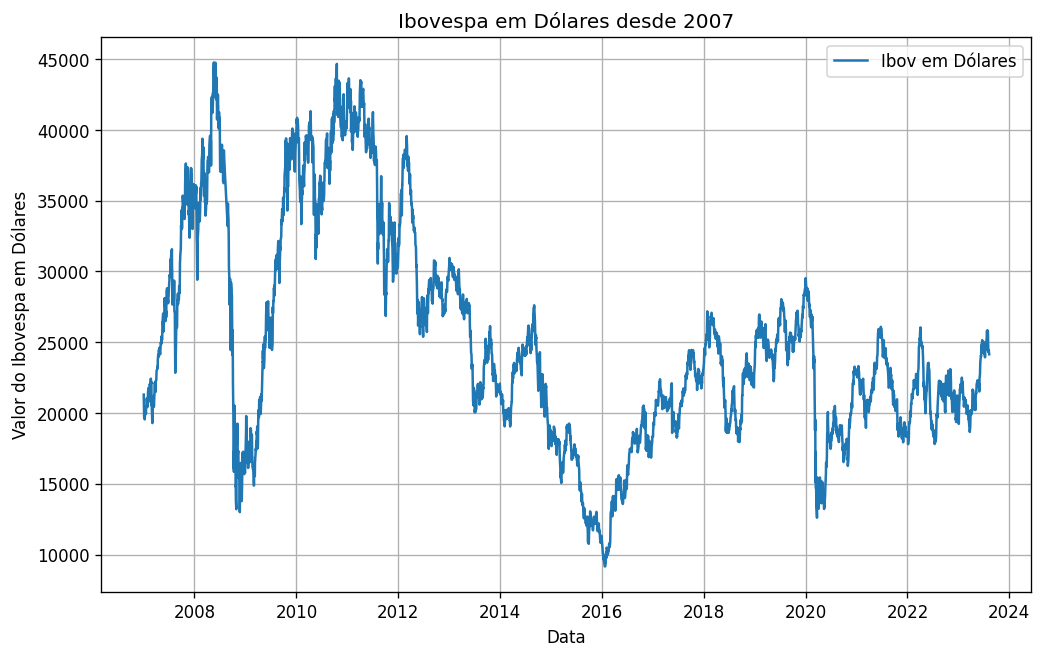

In [16]:
plt.figure(figsize=(10,6), dpi=120)
plt.plot(ibov_usd.index, ibov_usd['IBOV_USD'], label = 'Ibov em Dólares')
plt.xlabel('Data')
plt.ylabel('Valor do Ibovespa em Dólares')
plt.title('Ibovespa em Dólares desde ' + start_date[:4])
plt.legend()
plt.grid(True)
plt.show()

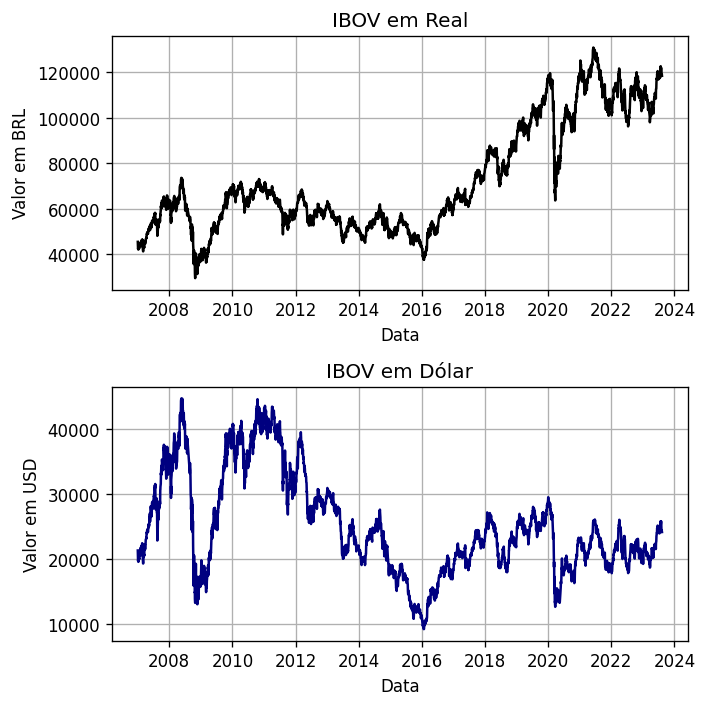

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6), dpi=120)

# plot do primeiro gráfico

ax1.plot(ibov_usd.index, ibov_usd['IBOV'], label = 'IBOV em Real', color= 'black')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor em BRL')
ax1.set_title('IBOV em Real')
ax1.grid(True)

# plot do segundo gráfico

ax2.plot(ibov_usd.index, ibov_usd['IBOV_USD'], label = 'IBOV em Dólar', color= 'navy')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor em USD')
ax2.set_title('IBOV em Dólar')
ax2.grid(True)

# ajuste do gráfico
plt.tight_layout()


# plot
plt.show()